- 直接就这视频往下看是看不懂的，我们有必要先进行一些准备工作

## [词嵌入（Word2vec）](https://zhuanlan.zhihu.com/p/27234078)

- [注解版,结合着看](/%E9%99%84%E5%BD%9518%20%E7%90%86%E8%A7%A3%20Word2Vec%20%E4%B9%8B%20Skip-Gram%20%E6%A8%A1%E5%9E%8B%20-%20%E7%9F%A5%E4%B9%8E.html)

- 什么是词嵌入？
  - Word2Vec是从大量文本语料中以无监督的方式学习语义知识的一种模型，它被大量地用在自然语言处理（NLP）中。
  - 自然语言是用来表达人脑思维的复杂系统。 在这个系统中，词是意义的基本单元。
  - 词向量是用于表示单词意义的向量， 并且还可以被认为是单词的特征向量或表示。 将单词映射到实向量的技术称为词嵌入。
  - 那么它是如何帮助我们做自然语言处理呢？
    - Word2Vec其实就是通过学习文本来用词向量的方式表征词的语义信息，
    - 即通过一个嵌入空间使得语义上相似的单词在该空间内距离很近。
    - Embedding其实就是一个映射，将单词从原先所属的空间映射到新的多维空间中，也就是把原先词所在空间嵌入到一个新的空间中去。

- Word2Vec模型实际上分为了两个部分，第一部分为建立模型，第二部分是通过模型获取嵌入词向量。
- Word2Vec的整个建模过程实际上与自编码器（auto-encoder）的思想很相似，即先基于训练数据构建一个神经网络，
- 当这个模型训练好以后，我们并不会用这个训练好的模型处理新的任务，我们真正需要的是这个模型通过训练数据所学得的参数，
  - 例如隐层的权重矩阵——后面我们将会看到这些权重在Word2Vec中实际上就是我们试图去学习的“word vectors”。基于训练数据建模的过程，
  - 我们给它一个名字叫“Fake Task”，意味着建模并不是我们最终的目的。

### 为何独热向量是一个糟糕的选择

- 我们曾经使用独热向量来表示词（字符就是单词）。假设词典中不同词的数量（词典大小）为，每个词对应一个从到的不同整数（索引）。
- 为了得到索引为的任意词的独热向量表示，我们创建了一个全为0的长度为N的向量，并将位置i的元素设置为1。这样，每个词都被表示为一个长度为N的向量，可以直接由神经网络使用。
- 虽然独热向量很容易构建，但它们通常不是一个好的选择。一个主要原因是独热向量不能准确表达不同词之间的相似度，
- 比如我们经常使用的“余弦相似度”。对于向量，它们的余弦相似度是它们之间角度的余弦：
- $$\frac{\mathbf{x}^\top \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|} \in [-1, 1].$$
- 独热向量不能反映向量之间的相似性

### 自监督的word2vec
- word2vec工具是为了解决上述问题而提出的。
  - 它将每个词映射到一个固定长度的向量，这些向量能更好地表达不同词之间的相似性和类比关系。
- word2vec工具包含两个模型，
  - 即跳元模型（skip-gram） [Mikolov et al., 2013b](/%E9%99%84%E5%BD%9500%20%E5%8F%82%E8%80%83%E6%96%87%E7%8C%AE/NIPS-2013-distributed-representations-of-words-and-phrases-and-their-compositionality-Paper.pdf)和连续词袋（CBOW） [Mikolov et al., 2013a](/%E9%99%84%E5%BD%9500%20%E5%8F%82%E8%80%83%E6%96%87%E7%8C%AE/Efficient%20Estimation%20of%20Word%20Representations%20in%20Vector%20Space.pdf)。
  - 对于在语义上有意义的表示，它们的训练依赖于条件概率，条件概率可以被看作是使用语料库中一些词来预测另一些单词。由于是不带标签的数据，因此跳元模型和连续词袋都是自监督模型。

这里李沐老师的教材讲的有点乱了，看b乎解释吧

1. The Fake Task
- 上面提到，训练模型的真正目的是获得模型基于训练数据学得的隐层权重。为了得到这些权重，首先要构建一个完整的神经网络作为“Fake Task”，后面再返回来看通过“Fake Task”如何间接地得到这些词向量。

<img src="https://pic4.zhimg.com/80/v2-ca21f9b1923e201c4349030a86f6dc1f_720w.png">

- 一图胜千言，具体解释见[附录18](/%E9%99%84%E5%BD%9518%20%E7%90%86%E8%A7%A3%20Word2Vec%20%E4%B9%8B%20Skip-Gram%20%E6%A8%A1%E5%9E%8B%20-%20%E7%9F%A5%E4%B9%8E.html)
- 两个关键参数：
  - skip_window：这个相当于我们用滑动窗口取词，这个窗口的长度span的左右边界最大长度
  - num_skips: 此参数相当于告诉我们，以中心词构建最多有2倍skip_window个词对，我们选取其中num_skips个作为训练样本
- 这里单词的输入依旧采用了one_hot编码，

### hidden_layer
- 如果我们现在想用300个特征来表示一个单词（即每个词可以被表示为300维的向量）。那么隐层的权重矩阵应该为10000行(one_hot编码)，300列（隐层有300个结点）。
    - Google在最新发布的基于Google news数据集训练的模型中使用的就是300个特征的词向量。词向量的维度是一个可以调节的超参数（在Python的gensim包中封装的Word2Vec接口默认的词向量大小为100， window_size为5）。

- 看下面的图片，左右两张图分别从不同角度代表了输入层-隐层的权重矩阵。左图中每一列代表一个10000维的词向量和隐层单个神经元连接的权重向量。从右边的图来看，每一行实际上代表了每个单词的词向量。
- <img src="picture/v2-c538566f7d627ce7ca40589f15ca8284_720w.png">

所以我们最终的目标就是学习这个隐层的权重矩阵。
我们现在回来接着通过模型的定义来训练我们的这个模型。

额外说一句，独热编码后的矩阵是非常稀疏的，矩阵的计算的结果实际上是矩阵对应的向量中值为1的索引，实际计算中是采用这种方式

- 第一部分我们了解skip-gram的输入层、隐层、输出层。在第二部分，会继续深入讲如何在skip-gram模型上进行高效的训练。
- 第一部分讲解完成后，我们会发现Word2Vec模型是一个超级大的神经网络（权重矩阵规模非常大）。
  - 举个栗子，我们拥有10000个单词的词汇表，我们如果想嵌入300维的词向量，那么我们的输入-隐层权重矩阵和隐层-输出层的权重矩阵都会有 10000 x 300 = 300万个权重，在如此庞大的神经网络中进行梯度下降是相当慢的。更糟糕的是，你需要大量的训练数据来调整这些权重并且避免过拟合。百万数量级的权重矩阵和亿万数量级的训练样本意味着训练这个模型将会是个灾难（太凶残了）。

- Word2Vec的作者在它的第二篇论文中强调了这些问题，下面是作者在第二篇论文中的三个创新：
  1. 将常见的单词组合（word pairs）或者词组作为单个“words”来处理。
  2. 对高频次单词进行抽样来减少训练样本的个数。
  3. 对优化目标采用“negative sampling”方法，这样每个训练样本的训练只会更新一小部分的模型权重，从而降低计算负担。
- 事实证明，对常用词抽样并且对优化目标采用“negative sampling”不仅降低了训练过程中的计算负担，还提高了训练的词向量的质量。

### Word pairs and "phases"
- 论文的作者指出，一些单词组合（或者词组）的含义和拆开以后具有完全不同的意义。比如“Boston Globe”是一种报刊的名字，而单独的“Boston”和“Globe”这样单个的单词却表达不出这样的含义。因此，在文章中只要出现“Boston Globe”，我们就应该把它作为一个单独的词来生成其词向量，而不是将其拆开。同样的例子还有“New York”，“United Stated”等。
- 在Google发布的模型中，它本身的训练样本中有来自Google News数据集中的1000亿的单词，但是除了单个单词以外，单词组合（或词组）又有3百万之多。
- 具体词汇表见附录

### 对高频词抽样(负采样技术)
- 对于“the”这种常用高频单词，之前的处理方式会存在下面两个问题：
  - the这玩意虽然高频，但其实不含有什么实际有用信息
  - （”the“，...）这种形式的训练样本会非常大，甚至可能会超过我们实际所需数量
- 解决办法
  - Word2Vec通过“抽样”模式来解决这种高频词问题。它的基本思想如下：
  - 对于我们在训练原始文本中遇到的每一个单词，它们都有一定概率被我们从文本中删掉，而这个被删除的概率与单词的频率有关。
  - 假设skip_window = 5，当删除次窗口中的一个the的时候，会减少10个训练样本

### 抽样率
- $w_i$ 是一个单词，那么$Z(w_i)$这个单词在所有语料中出现的频次。举个栗子，如果单词“peanut”在10亿规模大小的语料中出现了1000次，那么
- $$Z("peanut")=1000/1000000000 = 1e-6$$ 

- 还有一个参数叫“sample”，这个参数代表一个阈值，
- 默认值为0.001（在gensim包中的Word2Vec类说明中，这个参数默认为0.001，文档中对这个参数的解释为“高频词汇随机下采样阈值”）。
- 这个值越小意味着这个单词被保留下来的概率越小（即有越大的概率被我们删除）。

- $P(w_i)$代表着保留某个单词的概率：$P(w_i)=(\sqrt{\frac{Z(w_i)}{0.001}}+1)\times\frac{0.001}{Z(w_i)}$

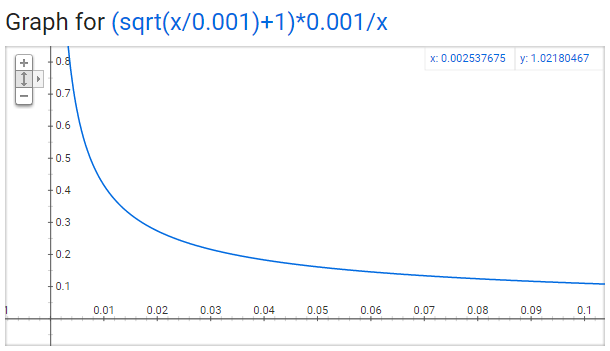

- 可以看到，随着单词出现频率的增高，它被采样保留的概率越来越小，我们还可以看到一些有趣的结论：
  - 当$Z(w_i)$<=0.0026时，$P(w_i)$=1.0。当单词在语料中出现的频率小于0.0026时，它是100%被保留的，这意味着只有那些在语料中出现频率超过0.26%的单词才会被采样。
  - 当$Z(w_i)$<=0.00746时，$P(w_i)$=0.5，意味着这一部分的单词有50%的概率被保留。
  - 当$Z(w_i)$<=1时，$P(w_i)$=0.033，意味着这部分单词以3.3%的概率被保留。

### 负采样（negative sampling）
- 训练一个神经网络意味着要输入训练样本并且不断调整神经元的权重，从而不断提高对目标的准确预测。每当神经网络经过一个训练样本的训练，它的权重就会进行一次调整。

  - vocabulary的大小决定了Skip-Gram神经网络将会拥有大规模的权重矩阵，实际中训练起来会非常慢且消耗资源。
  - 负采样（negative sampling）不同于原本每个训练样本更新所有的权重，
    - 负采样每次让一个训练样本仅仅更新一小部分的权重，这样就会降低梯度下降过程中的计算量。


  - 当我们用训练样本 ( input word: "fox"，output word: "quick") 来训练我们的神经网络时，“ fox”和“quick”都是经过one-hot编码的。
    - 如果我们的vocabulary大小为10000时，在输出层，我们期望对应“quick”单词的那个神经元结点输出1，其余9999个都应该输出0。
    - 在这里，这9999个我们期望输出为0的神经元结点所对应的单词我们称为“negative” word。
    - 当使用负采样时，我们将随机选择一小部分的negative words（比如选5个negative words）来更新对应的权重。
    - 我们也会对我们的“positive” word进行权重更新（在我们上面的例子中，这个单词指的是”quick“）。
  - 在论文中，作者指出指出对于小规模数据集，选择5-20个negative words会比较好，对于大规模数据集可以仅选择2-5个negative words。

### 总结：独热编码后的向量是大量的0和一个1，一次只选取少部分0值和1值进行更新
- 如果使用了负采样的方法我们仅仅去更新我们的positive word-“quick”的和我们选择的其他5个negative words的结点对应的权重，共计6个输出神经元，相当于每次只更新300*6=1800

### 如何选择negative words
- 我们使用“一元模型分布（unigram distribution）”来选择“negative words”：
- $$P(w_i)=\frac{f(w_i)^{3/4}}{\sum^n_{j=0}(f(w_j)^{3/4})}$$
- $f(w_j)$代表着单词出现的频次,公式中开3/4的根号完全是基于经验的，论文中提到这个公式的效果要比其它公式更加出色。

负采样的C语言实现非常的有趣。unigram table有一个包含了一亿个元素的数组，这个数组是由词汇表中每个单词的索引号填充的，并且这个数组中有重复，也就是说有些单词会出现多次。那么每个单词的索引在这个数组中出现的次数，计算出的负采样概率*1亿=单词在表中出现的次数。